In [1]:
# To run A3b code, import the A3 interface and run the desired A3 function: gradient_method or heuristic_method
import optimization_interfaces.A3_interface as A3
import numpy as np
import matplotlib.pyplot as plt
import random as randy
import modules.model_nWECs as model

import modules.model_nWECs_fixr as model_fixr
import scipy.optimize as scipy_opt





In [5]:
# ================================================================================= #
#                                   Set-Up                                          #
# ================================================================================= #
nwec = 4
# Initial Design Vector
r = 5
wecx = [0, randy.random()*200-100, randy.random()*200-100, randy.random()*200-100]
wecy = [0, randy.random()*200-100, randy.random()*200-100, randy.random()*200-100]
#wecx = [0, 40, 80, -20]
#wecy = [0, 0, 0, 0]
d0 = 3
damp = [d0, d0, d0, d0]
x0 = np.zeros(3*nwec-2)
x0[0] = r
x0[1] = damp[0]
for i in range(nwec-1):
    x0[1+i*3] = wecx[i+1]
    x0[2+i*3] = wecy[i+1]
    x0[3+i*3] = damp[i+1]

# Parameters
omega = 1.047
A = 1
rho_wec = 850
p = [omega,A,rho_wec,nwec]
opt={'xatol': 1e-5, 'disp': True}  


In [34]:
# ================================================================================= #
#                               Optimization Code                                   #
# ================================================================================= #
# Run Optimization
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.termination.default import DefaultMultiObjectiveTermination
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.callback import Callback

class MyCallback(Callback):

    def __init__(self) -> None:
        super().__init__()
        self.data["best"] = []

    def notify(self, algorithm):
        self.data["best"].append(algorithm.pop.get("F").min())


class MDO_Problem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=11,
                         n_obj=2,
                         n_ieq_constr=7,
                         xl=np.array([2,0,-1000,-1000,0,-1000,-1000,0,-1000,-1000,0]),
                         xu=np.array([100,10*8,1000,1000,10*8,1000,1000,10*8,1000,1000,10*8]))
    def _evaluate(self, x, out, *args, **kwargs):
        _,f2 = model.run(x,p)
        dist_list=[np.sqrt((x[2])**2+(x[3])**2),np.sqrt((x[5])**2+(x[6])**2),np.sqrt((x[8])**2+(x[9])**2),
                   np.sqrt((x[2]-x[5])**2+(x[3]-x[6])**2),np.sqrt((x[2]-x[8])**2+(x[3]-x[9])**2),np.sqrt((x[5]-x[8])**2+(x[6]-x[9])**2)]        
        g1 = -x[0]+2 # r min is 2m
        g2 = 2*x[0]-dist_list[0] # r2
        g3 = 2*x[0]-dist_list[1] # r3
        g4 = 2*x[0]-dist_list[2] # r4
        g5 = 2*x[0]-dist_list[3] # r2-r3
        g6 = 2*x[0]-dist_list[4] # r2-r4
        g7 = 2*x[0]-dist_list[5] # r3-r4

        # (n-1)! distance constraints, hard code for now
        out["F"] = [np.max(dist_list), f2]
        out["G"] = [g1,g2,g3,g4,g5,g6,g7]


problem=MDO_Problem()

algorithm = NSGA2(pop_size=10)

termination = DefaultMultiObjectiveTermination(
    xtol=1e-8,
    cvtol=1e-6,
    ftol=0.0025,
    period=30,
    n_max_gen=15,
    n_max_evals=1000
)
res = minimize(problem,
               algorithm,
               termination,
               ('n_gen', 20),
               seed=1,
               callback=MyCallback(),
               verbose=True)



Mesh resolution for DiffractionProblem(body=-999.7712503653103_-395.3348547363205_42.868156460852255, omega=1.047, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7200' of the body '-999.7712503653103_-395.3348547363205_42.868156460852255' might be insufficient for the wavelength λ=5.62e+01.
This warning appears because the largest panel of this mesh has radius 1.48e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=-815.3228104624044_-627.4795772446582_42.868156460852255, omega=1.047, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7206' of the body '-815.3228104624044_-627.4795772446582_42.868156460852255' might be insufficient for the wavelength λ=5.62e+01.
This warning appears because the largest panel of this mesh has radius 1.48e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=-206.46505153866008_77.63346800671388_42.868156460852255, omega=1.047, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7212' of the b

Look at this Nate 57.625959475372646
Look at this Nate 11.740471265369044
Look at this Nate 27.64485816344382
Look at this Nate 0.0
Power is: 3.0972528726750604e-06 MW


Mesh resolution for DiffractionProblem(body=-603.7970218302424_601.4891373510734_69.15151103888243, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7236' of the body '-603.7970218302424_601.4891373510734_69.15151103888243' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+01 > λ/8.
Mesh resolution for RadiationProblem(body=-603.7970218302424_601.4891373510734_69.15151103888243, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7236' of the body '-603.7970218302424_601.4891373510734_69.15151103888243' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 2.39e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_69.15151103888243, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7242' of the body '0.0_0.0_69.15151103888243' migh

Look at this Nate 16.356179978521396
Look at this Nate 53.637400814272176
Look at this Nate 11.230955087618701
Look at this Nate 0.0
Power is: 1.931223112690476e-06 MW


Mesh resolution for DiffractionProblem(body=-803.3063323338998_-157.78474998989566_32.7155694596058, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7260' of the body '-803.3063323338998_-157.78474998989566_32.7155694596058' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.13e+01 > λ/8.
Mesh resolution for RadiationProblem(body=-803.3063323338998_-157.78474998989566_32.7155694596058, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7260' of the body '-803.3063323338998_-157.78474998989566_32.7155694596058' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 1.13e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_32.7155694596058, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7266' of the body '0.0_0.0_32.7155694596058' mi

Look at this Nate 55.385809253545126
Look at this Nate 6.803536909582233
Look at this Nate 70.25140027435305
Look at this Nate 0.0
Power is: 5.220138820680823e-06 MW


Mesh resolution for DiffractionProblem(body=496.3313087596789_-439.11201587118967_54.25019792735567, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7284' of the body '496.3313087596789_-439.11201587118967_54.25019792735567' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.88e+01 > λ/8.
Mesh resolution for RadiationProblem(body=496.3313087596789_-439.11201587118967_54.25019792735567, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7284' of the body '496.3313087596789_-439.11201587118967_54.25019792735567' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 1.88e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_54.25019792735567, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7290' of the body '0.0_0.0_54.25019792735567' 

Look at this Nate 55.35016911603787
Look at this Nate 66.77005375178983
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 2.901470651745705e-06 MW


Mesh resolution for DiffractionProblem(body=-576.7437679998819_-468.9066812555476_12.116148644608918, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7308' of the body '-576.7437679998819_-468.9066812555476_12.116148644608918' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 4.19e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_12.116148644608918, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7314' of the body '0.0_0.0_12.116148644608918' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 4.19e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_7.2295294214738774, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7320' of the body '-706.5428501883797_178.61107380656858_7.229529

Look at this Nate 35.83148209407241
Look at this Nate 23.022027086907897
Look at this Nate 54.30684263519127
Look at this Nate 0.0
Power is: 0.00020319897771975458 MW


Mesh resolution for DiffractionProblem(body=-171.64146094619468_-900.0930821078257_7.2295294214738774, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7332' of the body '-171.64146094619468_-900.0930821078257_7.2295294214738774' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.50e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.2295294214738774, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7338' of the body '0.0_0.0_7.2295294214738774' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.50e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=889.1895119816268_173.1100810039859_67.0518752315393, omega=1.047, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7344' of the body '889.1895119816268_173.1100810039859_67.051875231539

Look at this Nate 45.92940843936105
Look at this Nate 55.9806688016745
Look at this Nate 55.55201261821961
Look at this Nate 0.0
Power is: 0.00022586459075068946 MW


Mesh resolution for DiffractionProblem(body=-204.6463260289329_-669.2916057661345_67.0518752315393, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7356' of the body '-204.6463260289329_-669.2916057661345_67.0518752315393' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.32e+01 > λ/8.
Mesh resolution for RadiationProblem(body=-204.6463260289329_-669.2916057661345_67.0518752315393, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7356' of the body '-204.6463260289329_-669.2916057661345_67.0518752315393' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 2.32e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_67.0518752315393, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7362' of the body '0.0_0.0_67.0518752315393' might 

Look at this Nate 41.191128964664685
Look at this Nate 72.27215322303068
Look at this Nate 64.5913030967619
Look at this Nate 0.0
Power is: 4.76758619379876e-06 MW


Mesh resolution for DiffractionProblem(body=791.7724363921336_-143.81762025741023_36.08105425505964, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7380' of the body '791.7724363921336_-143.81762025741023_36.08105425505964' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.25e+01 > λ/8.
Mesh resolution for RadiationProblem(body=791.7724363921336_-143.81762025741023_36.08105425505964, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7380' of the body '791.7724363921336_-143.81762025741023_36.08105425505964' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 1.25e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_36.08105425505964, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7386' of the body '0.0_0.0_36.08105425505964' 

Look at this Nate 60.06496825089244
Look at this Nate 49.893776564448714
Look at this Nate 21.594231341202086
Look at this Nate 0.0
Power is: 7.0780793889998125e-06 MW


Mesh resolution for DiffractionProblem(body=806.7590411245076_147.35897334457172_67.01726678620791, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7404' of the body '806.7590411245076_147.35897334457172_67.01726678620791' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.32e+01 > λ/8.
Mesh resolution for RadiationProblem(body=806.7590411245076_147.35897334457172_67.01726678620791, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7404' of the body '806.7590411245076_147.35897334457172_67.01726678620791' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 2.32e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_67.01726678620791, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7410' of the body '0.0_0.0_67.01726678620791' migh

Look at this Nate 49.73565761672974
Look at this Nate 35.99297067839524
Look at this Nate 18.96215841944222
Look at this Nate 0.0
Power is: 5.096081239821555e-06 MW


Mesh resolution for DiffractionProblem(body=858.8744674875227_381.7938350338479_62.48020153483094, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7428' of the body '858.8744674875227_381.7938350338479_62.48020153483094' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.16e+01 > λ/8.
Mesh resolution for RadiationProblem(body=858.8744674875227_381.7938350338479_62.48020153483094, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7428' of the body '858.8744674875227_381.7938350338479_62.48020153483094' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 2.16e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_62.48020153483094, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7434' of the body '0.0_0.0_62.48020153483094' might be

Look at this Nate 26.13159214176769
Look at this Nate 28.58158080019998
Look at this Nate 1.2656994277245026
Look at this Nate 0.0
Power is: 9.416941095153368e-07 MW
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       10 |      1 |  0.000000E+00 |  0.000000E+00 |             - |             -


Mesh resolution for DiffractionProblem(body=456.6167073814632_-429.7785679648501_7.187397087990387, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7452' of the body '456.6167073814632_-429.7785679648501_7.187397087990387' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.48e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.187397087990387, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7458' of the body '0.0_0.0_7.187397087990387' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.48e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-787.0570136088045_-395.3348547363205_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7464' of the body '-787.0570136088045_-395.3348547363205_10.40392162512

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.005425559471539592 MW


Mesh resolution for DiffractionProblem(body=-206.46505153866008_-510.81994003755847_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7476' of the body '-206.46505153866008_-510.81994003755847_10.403921625120542' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 3.60e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7482' of the body '0.0_0.0_10.403921625120542' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 3.60e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=752.7783045920767_789.2133270076947_32.7155694596058, omega=1.047, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7488' of the body '752.7783045920767_789.2133270076947_32.7155694596

Look at this Nate 59.0728122737808
Look at this Nate 11.740471265369044
Look at this Nate 27.64485816344382
Look at this Nate 0.0
Power is: 0.00042818059963174493 MW


Mesh resolution for DiffractionProblem(body=-803.3063323338998_-155.4339735335951_32.7155694596058, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7500' of the body '-803.3063323338998_-155.4339735335951_32.7155694596058' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.13e+01 > λ/8.
Mesh resolution for RadiationProblem(body=-803.3063323338998_-155.4339735335951_32.7155694596058, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7500' of the body '-803.3063323338998_-155.4339735335951_32.7155694596058' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 1.13e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_32.7155694596058, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7506' of the body '0.0_0.0_32.7155694596058' might 

Look at this Nate 49.714344393987425
Look at this Nate 6.803536909582233
Look at this Nate 70.25140027435305
Look at this Nate 0.0
Power is: 3.892520394977063e-06 MW


Mesh resolution for DiffractionProblem(body=-171.64146094619468_-900.0930821078257_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7524' of the body '-171.64146094619468_-900.0930821078257_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7530' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=758.1811375045697_-412.77170325264103_12.540597211788487, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7536' of the body '758.1811375045697_-412.77170325264103_12.54059721178

Look at this Nate 45.883159775396926
Look at this Nate 49.507248195824296
Look at this Nate 19.552481453888927
Look at this Nate 0.0
Power is: 0.0002314878442518825 MW


Mesh resolution for DiffractionProblem(body=-576.7437679998819_-373.38933247515286_12.540597211788487, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7548' of the body '-576.7437679998819_-373.38933247515286_12.540597211788487' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 4.34e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_12.540597211788487, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7554' of the body '0.0_0.0_12.540597211788487' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 4.34e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-347.7512332557328_178.61107380656858_54.324666214330506, omega=1.047, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7560' of the body '-347.7512332557328_178.61107380656858_54.324666

Look at this Nate 14.630246080842948
Look at this Nate 24.283218222324585
Look at this Nate 11.216454211656679
Look at this Nate 0.0
Power is: 0.0001184005420060167 MW


Mesh resolution for DiffractionProblem(body=-131.92686329971207_-909.3612487836967_54.324666214330506, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7572' of the body '-131.92686329971207_-909.3612487836967_54.324666214330506' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.88e+01 > λ/8.
Mesh resolution for RadiationProblem(body=-131.92686329971207_-909.3612487836967_54.324666214330506, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7572' of the body '-131.92686329971207_-909.3612487836967_54.324666214330506' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 1.88e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_54.324666214330506, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7578' of the body '0.0_0.0_54.3246662

Look at this Nate 45.92940843936105
Look at this Nate 56.19262735247608
Look at this Nate 55.55201261821961
Look at this Nate 0.0
Power is: 8.694026779648825e-06 MW


Mesh resolution for DiffractionProblem(body=-576.7437679998819_119.54673255276344_44.58199625144271, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7596' of the body '-576.7437679998819_119.54673255276344_44.58199625144271' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.54e+01 > λ/8.
Mesh resolution for RadiationProblem(body=-576.7437679998819_119.54673255276344_44.58199625144271, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7596' of the body '-576.7437679998819_119.54673255276344_44.58199625144271' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 1.54e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_44.58199625144271, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7602' of the body '0.0_0.0_44.58199625144271' 

Look at this Nate 34.38462920339069
Look at this Nate 23.022027086907897
Look at this Nate 54.30684263519127
Look at this Nate 0.0
Power is: 1.506418948561652e-06 MW


Mesh resolution for DiffractionProblem(body=806.7590411245076_145.00819688827121_67.01726678620791, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7620' of the body '806.7590411245076_145.00819688827121_67.01726678620791' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.32e+01 > λ/8.
Mesh resolution for RadiationProblem(body=806.7590411245076_145.00819688827121_67.01726678620791, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7620' of the body '806.7590411245076_145.00819688827121_67.01726678620791' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 2.32e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_67.01726678620791, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7626' of the body '0.0_0.0_67.01726678620791' migh

Look at this Nate 55.40712247628745
Look at this Nate 35.99297067839524
Look at this Nate 18.96215841944222
Look at this Nate 0.0
Power is: 7.231832171748063e-06 MW


Mesh resolution for DiffractionProblem(body=791.7724363921336_-143.81762025741023_36.29356144084646, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7644' of the body '791.7724363921336_-143.81762025741023_36.29356144084646' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.25e+01 > λ/8.
Mesh resolution for RadiationProblem(body=791.7724363921336_-143.81762025741023_36.29356144084646, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7644' of the body '791.7724363921336_-143.81762025741023_36.29356144084646' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 1.25e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_36.29356144084646, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7650' of the body '0.0_0.0_36.29356144084646' 

Look at this Nate 58.19176859349517
Look at this Nate 56.36719717029891
Look at this Nate 57.59377159150978
Look at this Nate 0.0
Power is: 8.898845401547209e-06 MW


Mesh resolution for DiffractionProblem(body=-165.39039526574606_75.02084532655499_68.73388968888091, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7662' of the body '-165.39039526574606_75.02084532655499_68.73388968888091' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+01 > λ/8.
Mesh resolution for RadiationProblem(body=-165.39039526574606_75.02084532655499_68.73388968888091, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7662' of the body '-165.39039526574606_75.02084532655499_68.73388968888091' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 2.38e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=-603.7970218302424_505.9701457898956_68.73388968888091, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7668' of the body

Look at this Nate 37.557417320562266
Look at this Nate 47.74707457076164
Look at this Nate 54.32217658051796
Look at this Nate 0.0
Power is: 1.510130467781104e-07 MW
     2 |       20 |      1 |  0.000000E+00 |  0.000000E+00 |  1.040919E+04 |         ideal


Mesh resolution for DiffractionProblem(body=-186.7650857818866_-510.81994003755847_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7692' of the body '-186.7650857818866_-510.81994003755847_10.403921625120542' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 3.60e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7698' of the body '0.0_0.0_10.403921625120542' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 3.60e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-902.9574274352913_-423.0861371286305_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7704' of the body '-902.9574274352913_-423.0861371286305_7.021960

Look at this Nate 59.0728122737808
Look at this Nate 11.740471265369044
Look at this Nate 38.421224972130865
Look at this Nate 0.0
Power is: 0.0017266339471787775 MW


Mesh resolution for DiffractionProblem(body=-171.64146094619468_-955.9580491644706_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7716' of the body '-171.64146094619468_-955.9580491644706_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7722' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=451.99597070090294_766.6121824116196_31.95557396681713, omega=1.047, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7728' of the body '451.99597070090294_766.6121824116196_31.95557396681713' m

Look at this Nate 46.435837647820414
Look at this Nate 22.496328873363193
Look at this Nate 19.552481453888927
Look at this Nate 0.0
Power is: 0.00024256166968032045 MW


Mesh resolution for RadiationProblem(body=-739.584665068657_-306.32512232507645_31.95557396681713, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7734' of the body '-739.584665068657_-306.32512232507645_31.95557396681713' might be insufficient for the wavelength λ=6.16e+01.
This warning appears because the largest panel of this mesh has radius 1.10e+01 > λ/8.
Mesh resolution for DiffractionProblem(body=-152.82483186072454_-923.5960498698803_31.95557396681713, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7740' of the body '-152.82483186072454_-923.5960498698803_31.95557396681713' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.10e+01 > λ/8.
Mesh resolution for RadiationProblem(body=-152.82483186072454_-923.5960498698803_31.95557396681713, omega=1.000, depth=inf, radiating_dof=Heave):
The resolution of the mesh 'sphere_7740' of the body '

Look at this Nate 46.1840444034686
Look at this Nate 49.51962384426125
Look at this Nate 19.627759828792204
Look at this Nate 0.0
Power is: 3.292376033124638e-06 MW


Mesh resolution for DiffractionProblem(body=-960.1947179888364_-965.2775150235314_11.919319264953142, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7758' of the body '-960.1947179888364_-965.2775150235314_11.919319264953142' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 4.12e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=446.6878102090925_-373.38933247515286_11.919319264953142, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7764' of the body '446.6878102090925_-373.38933247515286_11.919319264953142' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 4.12e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_11.919319264953142, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7770' of the body '0.0_0.0_11.91931

Look at this Nate 60.088410774761314
Look at this Nate 24.190969144980293
Look at this Nate 10.447561984335938
Look at this Nate 0.0
Power is: 0.0014013846635201116 MW


Mesh resolution for DiffractionProblem(body=-171.64146094619468_-900.0930821078257_7.2295294214738774, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7788' of the body '-171.64146094619468_-900.0930821078257_7.2295294214738774' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.50e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.2295294214738774, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7794' of the body '0.0_0.0_7.2295294214738774' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.50e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8229614620972_430.5715572594187_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7800' of the body '-729.8229614620972_430.5715572594187_4.17391182

Look at this Nate 59.08304442419393
Look at this Nate 55.9806688016745
Look at this Nate 55.55201261821961
Look at this Nate 0.0
Power is: 0.0005946909596537387 MW


Mesh resolution for DiffractionProblem(body=436.9167398948341_-520.3111230415927_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7812' of the body '436.9167398948341_-520.3111230415927_4.17391182948608' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7818' of the body '0.0_0.0_4.17391182948608' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=972.0409838678927_188.92550825839294_12.116148644608918, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7824' of the body '972.0409838678927_188.92550825839294_12.116148644608918' 

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.005857535585974509 MW


Mesh resolution for DiffractionProblem(body=-576.7437679998819_-468.9066812555476_12.116148644608918, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7836' of the body '-576.7437679998819_-468.9066812555476_12.116148644608918' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 4.19e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_12.116148644608918, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7842' of the body '0.0_0.0_12.116148644608918' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 4.19e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7848' of the body '-706.5428501883797_178.61107380656858_7.02196019

Look at this Nate 35.27880422164893
Look at this Nate 50.0329465208658
Look at this Nate 54.30684263519127
Look at this Nate 0.0
Power is: 0.0003495007928404806 MW


Mesh resolution for DiffractionProblem(body=772.909650223311_-119.01189705487644_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7860' of the body '772.909650223311_-119.01189705487644_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7866' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-727.7603476263447_357.8629125943808_7.187397087990387, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7872' of the body '-727.7603476263447_357.8629125943808_7.187397087990387' mi

Look at this Nate 59.764083622713756
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.09264768186412488 MW


Mesh resolution for DiffractionProblem(body=-566.813930888791_-363.2418576241952_7.187397087990387, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7884' of the body '-566.813930888791_-363.2418576241952_7.187397087990387' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.48e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.187397087990387, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7890' of the body '0.0_0.0_7.187397087990387' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.48e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-787.0570136088045_-435.62196422286024_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7896' of the body '-787.0570136088045_-435.62196422286024_10.403921625

Look at this Nate 9.89941869831533
Look at this Nate 66.65005950633217
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0006024920373480222 MW


Mesh resolution for DiffractionProblem(body=-206.46505153866008_-510.81994003755847_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7908' of the body '-206.46505153866008_-510.81994003755847_10.403921625120542' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 3.60e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7914' of the body '0.0_0.0_10.403921625120542' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 3.60e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-874.5897235230918_177.96159486253924_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7920' of the body '-874.5897235230918_177.96159486253924_7.019

Look at this Nate 45.91917628892345
Look at this Nate 11.740471265369044
Look at this Nate 27.64485816344382
Look at this Nate 0.0
Power is: 0.00014031207148390484 MW
     3 |       30 |      1 |  0.000000E+00 |  0.000000E+00 |  4.208343E+02 |         ideal


Mesh resolution for DiffractionProblem(body=456.6167073814632_-415.19436772775356_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7932' of the body '456.6167073814632_-415.19436772775356_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7938' of the body '0.0_0.0_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8229614620972_430.5715572594187_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7944' of the body '-729.8229614620972_430.5715572594187_4.17391182948608

Look at this Nate 55.35016911603787
Look at this Nate 49.93597013126347
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.09869630136702286 MW


Mesh resolution for DiffractionProblem(body=-184.40260868123795_-520.7281684750234_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7956' of the body '-184.40260868123795_-520.7281684750234_4.17391182948608' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7962' of the body '0.0_0.0_4.17391182948608' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-563.6223156592596_-395.3348547363205_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7968' of the body '-563.6223156592596_-395.3348547363205_10.40392162512

Look at this Nate 55.061984831768406
Look at this Nate 14.011688620202992
Look at this Nate 29.708860127906153
Look at this Nate 0.0
Power is: 0.006220551076922693 MW


Mesh resolution for DiffractionProblem(body=-186.7650857818866_-510.81994003755847_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7980' of the body '-186.7650857818866_-510.81994003755847_10.403921625120542' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 3.60e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7986' of the body '0.0_0.0_10.403921625120542' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 3.60e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_7992' of the body '-706.5428501883797_178.61107380656858_7.021960

Look at this Nate 42.52015872408014
Look at this Nate 11.740471265369044
Look at this Nate 41.24536183084993
Look at this Nate 0.0
Power is: 9.663476541629778e-05 MW


Mesh resolution for DiffractionProblem(body=-190.81185929450572_-960.705780497266_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8004' of the body '-190.81185929450572_-960.705780497266_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8010' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-731.579177453607_210.28930959642696_7.2295294214738774, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8016' of the body '-731.579177453607_210.28930959642696_7.2295294214738774

Look at this Nate 59.764083622713756
Look at this Nate 49.484863104978544
Look at this Nate 19.997292408129127
Look at this Nate 0.0
Power is: 0.0004059341687026128 MW


Mesh resolution for DiffractionProblem(body=-176.87169895154148_-900.0930821078257_7.2295294214738774, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8028' of the body '-176.87169895154148_-900.0930821078257_7.2295294214738774' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.50e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.2295294214738774, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8034' of the body '0.0_0.0_7.2295294214738774' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.50e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_373.65133430719663_7.190195205369722, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8040' of the body '-706.5428501883797_373.65133430719663_7.19019

Look at this Nate 55.333274903097134
Look at this Nate 55.9806688016745
Look at this Nate 56.28014818181666
Look at this Nate 0.0
Power is: 0.005041823868580504 MW


Mesh resolution for DiffractionProblem(body=772.909650223311_-133.59609729188693_7.190195205369722, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8052' of the body '772.909650223311_-133.59609729188693_7.190195205369722' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.49e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.190195205369722, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8058' of the body '0.0_0.0_7.190195205369722' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.49e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-787.0570136088045_-395.3348547363205_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8064' of the body '-787.0570136088045_-395.3348547363205_10.40392162512

Look at this Nate 59.764083622713756
Look at this Nate 66.50352593021354
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.00044337622554853633 MW


Mesh resolution for DiffractionProblem(body=414.8542961856805_-510.40289460412794_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8076' of the body '414.8542961856805_-510.40289460412794_10.403921625120542' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 3.60e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_10.403921625120542, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8082' of the body '0.0_0.0_10.403921625120542' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 3.60e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-727.7603476263447_373.00185536316735_3.41338700006283, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8088' of the body '-727.7603476263447_373.00185536316735_3.41338700

Look at this Nate 59.36099655805025
Look at this Nate 64.28817167795712
Look at this Nate 76.5436359396259
Look at this Nate 0.0
Power is: 0.000604453964563553 MW


Mesh resolution for DiffractionProblem(body=271.2799881676929_-429.7785679648501_3.41338700006283, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8100' of the body '271.2799881676929_-429.7785679648501_3.41338700006283' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.18e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_3.41338700006283, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8106' of the body '0.0_0.0_3.41338700006283' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.18e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8112' of the body '-706.5428501883797_178.61107380656858_2.1636376995599544

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 66.3501043071261
Look at this Nate 0.0
Power is: 0.0033711503934715087 MW


Mesh resolution for DiffractionProblem(body=792.0003156511896_-50.09552918654629_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8124' of the body '792.0003156511896_-50.09552918654629_2.1636376995599544' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.48e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8130' of the body '0.0_0.0_2.1636376995599544' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.48e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=-704.7866341968698_439.1804329748536_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8136' of the body '-704.7866341968698_439.1804329748536_4.173911829486

Look at this Nate 45.883159775396926
Look at this Nate 49.903786006857516
Look at this Nate 21.43891178310796
Look at this Nate 0.0
Power is: 0.005977601282428488 MW


Mesh resolution for DiffractionProblem(body=442.14697708372637_-520.3111230415927_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8148' of the body '442.14697708372637_-520.3111230415927_4.17391182948608' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8154' of the body '0.0_0.0_4.17391182948608' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-727.7603476263447_373.00185536316735_3.41338700006283, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8160' of the body '-727.7603476263447_373.00185536316735_3.41338700006283' 

Look at this Nate 59.09993863713467
Look at this Nate 66.55809520059063
Look at this Nate 78.26450547891821
Look at this Nate 0.0
Power is: 0.0017912245228735911 MW
     4 |       40 |      1 |  0.000000E+00 |  0.000000E+00 |  1.5336089602 |         ideal


Mesh resolution for DiffractionProblem(body=271.2799881676929_-389.8924674979994_3.41338700006283, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8172' of the body '271.2799881676929_-389.8924674979994_3.41338700006283' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.18e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_3.41338700006283, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8178' of the body '0.0_0.0_3.41338700006283' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.18e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.59625903146235_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8184' of the body '-706.5428501883797_178.59625903146235_7.02196019842755' mi

Look at this Nate 55.20822166858594
Look at this Nate 66.1211113298328
Look at this Nate 78.45368408157559
Look at this Nate 0.0
Power is: 0.003542735596546137 MW


Mesh resolution for DiffractionProblem(body=772.909650223311_-398.74775000403827_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8196' of the body '772.909650223311_-398.74775000403827_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8202' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-879.1659709290999_430.5715572594187_3.7836872528474523, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8208' of the body '-879.1659709290999_430.5715572594187_3.7836872528474523' 

Look at this Nate 59.95815949836385
Look at this Nate 49.881838627911826
Look at this Nate 78.54495201863114
Look at this Nate 0.0
Power is: 0.016199528436082196 MW


Mesh resolution for DiffractionProblem(body=486.2636206796753_-519.0539015997572_3.7836872528474523, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8220' of the body '486.2636206796753_-519.0539015997572_3.7836872528474523' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.31e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_3.7836872528474523, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8226' of the body '0.0_0.0_3.7836872528474523' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.31e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8232' of the body '-706.5428501883797_178.61107380656858_7.0219601984

Look at this Nate 55.35016911603787
Look at this Nate 50.22500094876689
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.001342727727792546 MW


Mesh resolution for DiffractionProblem(body=773.1614933846687_-119.01189705487644_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8244' of the body '773.1614933846687_-119.01189705487644_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8250' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8461551622509_430.5715572594187_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8256' of the body '-729.8461551622509_430.5715572594187_4.17391182948608' mi

Look at this Nate 59.764083622713756
Look at this Nate 49.881400916011756
Look at this Nate 21.51999655951405
Look at this Nate 0.0
Power is: 0.00020812231806924952 MW


Mesh resolution for DiffractionProblem(body=-175.66597560418376_-520.3111230415927_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8268' of the body '-175.66597560418376_-520.3111230415927_4.17391182948608' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8274' of the body '0.0_0.0_4.17391182948608' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-727.7603476263447_373.00185536316735_7.187397087990387, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8280' of the body '-727.7603476263447_373.00185536316735_7.1873970879903

Look at this Nate 55.35016911603787
Look at this Nate 55.45630564809672
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.00195132975455515 MW


Mesh resolution for DiffractionProblem(body=456.6167073814632_-429.7785679648501_7.187397087990387, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8292' of the body '456.6167073814632_-429.7785679648501_7.187397087990387' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.48e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.187397087990387, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8298' of the body '0.0_0.0_7.187397087990387' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.48e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-874.5897235230918_177.97640963764547_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8304' of the body '-874.5897235230918_177.97640963764547_7.0191620810482

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 66.98247113597986
Look at this Nate 0.0
Power is: 0.005406498528071224 MW


Mesh resolution for DiffractionProblem(body=456.6167073814632_-135.45851477855993_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8316' of the body '456.6167073814632_-135.45851477855993_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8322' of the body '0.0_0.0_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-725.2467129776892_177.96159486253924_7.241719430169549, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8328' of the body '-725.2467129776892_177.96159486253924_7.24171943016

Look at this Nate 55.15609324038777
Look at this Nate 49.935532419363405
Look at this Nate 21.423574626330982
Look at this Nate 0.0
Power is: 0.00032988702529131717 MW


Mesh resolution for DiffractionProblem(body=345.76383643058824_-416.4515891695892_7.241719430169549, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8340' of the body '345.76383643058824_-416.4515891695892_7.241719430169549' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.50e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.241719430169549, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8346' of the body '0.0_0.0_7.241719430169549' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.50e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-629.426500190428_178.61107380656858_5.544753161028948, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8352' of the body '-629.426500190428_178.61107380656858_5.5447531610289

Look at this Nate 55.35016911603787
Look at this Nate 66.26906433140476
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.001004421965767475 MW


Mesh resolution for DiffractionProblem(body=791.7484724898319_-50.09552918654629_5.544753161028948, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8364' of the body '791.7484724898319_-50.09552918654629_5.544753161028948' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.92e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_5.544753161028948, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8370' of the body '0.0_0.0_5.544753161028948' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.92e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-731.5559837534533_210.28930959642696_7.2295294214738774, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8376' of the body '-731.5559837534533_210.28930959642696_7.229529421473

Look at this Nate 45.883159775396926
Look at this Nate 49.903786006857516
Look at this Nate 21.43786818989272
Look at this Nate 0.0
Power is: 0.0007169064489239706 MW


Mesh resolution for DiffractionProblem(body=435.7110160065295_-900.0930821078257_7.2295294214738774, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8388' of the body '435.7110160065295_-900.0930821078257_7.2295294214738774' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.50e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.2295294214738774, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8394' of the body '0.0_0.0_7.2295294214738774' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.50e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8229614620972_187.97004571413754_4.242263686145353, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8400' of the body '-729.8229614620972_187.97004571413754_4.242263686

Look at this Nate 55.333274903097134
Look at this Nate 67.08245835177368
Look at this Nate 56.28014818181666
Look at this Nate 0.0
Power is: 0.0007498421840596745 MW
     5 |       50 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f


Mesh resolution for DiffractionProblem(body=-233.86204501129941_-520.7281684750234_4.242263686145353, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8412' of the body '-233.86204501129941_-520.7281684750234_4.242263686145353' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.47e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.242263686145353, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8418' of the body '0.0_0.0_4.242263686145353' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.47e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8229614620972_430.5715572594187_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8424' of the body '-729.8229614620972_430.5715572594187_4.04661970229

Look at this Nate 55.061984831768406
Look at this Nate 14.011688620202992
Look at this Nate 29.708860127906153
Look at this Nate 0.0
Power is: 0.001224468055333941 MW


Mesh resolution for DiffractionProblem(body=436.59657591989486_-520.1117243094064_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8436' of the body '436.59657591989486_-520.1117243094064_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8442' of the body '0.0_0.0_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8448' of the body '-706.5428501883797_178.61107380656858_2.1636376995

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 1.1450022374741244 MW


Mesh resolution for DiffractionProblem(body=792.0003156511896_-50.25907252892179_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8460' of the body '792.0003156511896_-50.25907252892179_2.1636376995599544' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.48e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8466' of the body '0.0_0.0_2.1636376995599544' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.48e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=-726.4269739413776_373.4762448807953_7.187397087990387, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8472' of the body '-726.4269739413776_373.4762448807953_7.18739708799

Look at this Nate 45.88563896134856
Look at this Nate 49.93565261104319
Look at this Nate 78.00720962203678
Look at this Nate 0.0
Power is: 0.009577018813102484 MW


Mesh resolution for DiffractionProblem(body=-196.05286399313212_-429.7785679648501_7.187397087990387, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8484' of the body '-196.05286399313212_-429.7785679648501_7.187397087990387' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.48e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.187397087990387, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8490' of the body '0.0_0.0_7.187397087990387' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.48e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.59572151603564_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8496' of the body '-706.5428501883797_178.59572151603564_7.0219601984

Look at this Nate 55.06794202964347
Look at this Nate 66.55809520059063
Look at this Nate 30.303627512768664
Look at this Nate 0.0
Power is: 0.000547134561179722 MW


Mesh resolution for DiffractionProblem(body=772.909650223311_-400.50460564430097_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8508' of the body '772.909650223311_-400.50460564430097_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8514' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_421.2125853518448_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8520' of the body '-706.5428501883797_421.2125853518448_6.953608357129566' mi

Look at this Nate 59.772448268320936
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.00036112174520651206 MW


Mesh resolution for DiffractionProblem(body=822.0844182949752_-119.01189705487644_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8532' of the body '822.0844182949752_-119.01189705487644_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8538' of the body '0.0_0.0_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-874.5897235230918_177.96159486253924_7.146454327925143, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8544' of the body '-874.5897235230918_177.96159486253924_7.14645432792

Look at this Nate 59.764083622713756
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 4.441037864079003 MW


Mesh resolution for DiffractionProblem(body=456.9368713564024_-415.3937664599399_7.146454327925143, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8556' of the body '456.9368713564024_-415.3937664599399_7.146454327925143' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.47e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.146454327925143, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8562' of the body '0.0_0.0_7.146454327925143' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.47e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-874.5897235230918_177.96159486253924_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8568' of the body '-874.5897235230918_177.96159486253924_7.0191620810482

Look at this Nate 55.35016911603787
Look at this Nate 49.93597013126347
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.009328214442237612 MW


Mesh resolution for DiffractionProblem(body=456.6167073814632_-415.0308243847786_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8580' of the body '456.6167073814632_-415.0308243847786_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8586' of the body '0.0_0.0_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-727.6611507095661_430.0971677417907_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8592' of the body '-727.6611507095661_430.0971677417907_4.17391182948608' 

Look at this Nate 55.3476899300862
Look at this Nate 49.90410352707779
Look at this Nate 15.604422355541033
Look at this Nate 0.0
Power is: 0.00023915302332725777 MW


Mesh resolution for DiffractionProblem(body=468.2669593371902_-520.7281684750234_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8604' of the body '468.2669593371902_-520.7281684750234_4.17391182948608' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.17391182948608, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8610' of the body '0.0_0.0_4.17391182948608' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.6116113219953_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8616' of the body '-706.5428501883797_178.6116113219953_7.02196019842755' migh

Look at this Nate 55.344211918162806
Look at this Nate 14.011688620202992
Look at this Nate 62.68636882069863
Look at this Nate 0.0
Power is: 0.0011737193906142364 MW


Mesh resolution for DiffractionProblem(body=772.909650223311_-117.25504141459714_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8628' of the body '772.909650223311_-117.25504141459714_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8634' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.59625903146235_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8640' of the body '-706.5428501883797_178.59625903146235_7.02196019842755' mi

Look at this Nate 59.949794852756675
Look at this Nate 49.881838627911826
Look at this Nate 78.54495201863114
Look at this Nate 0.0
Power is: 0.00041518033298888117 MW
     6 |       60 |      1 |  0.000000E+00 |  0.000000E+00 |  2.262736E+01 |         ideal


Mesh resolution for DiffractionProblem(body=772.9939504399848_-71.9875010983396_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8652' of the body '772.9939504399848_-71.9875010983396_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8658' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_179.17892702780313_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8664' of the body '-706.5428501883797_179.17892702780313_7.02196019842755' migh

Look at this Nate 59.94415766602353
Look at this Nate 49.94067728823281
Look at this Nate 78.00055414550457
Look at this Nate 0.0
Power is: 0.016341283910599934 MW


Mesh resolution for DiffractionProblem(body=772.909650223311_-511.9249453444494_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8676' of the body '772.909650223311_-511.9249453444494_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8682' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-683.3473373170019_106.5764461661697_7.017693874639983, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8688' of the body '-683.3473373170019_106.5764461661697_7.017693874639983' migh

Look at this Nate 59.764083622713756
Look at this Nate 49.881400916011756
Look at this Nate 22.494313340480133
Look at this Nate 0.0
Power is: 0.005947045037856233 MW


Mesh resolution for DiffractionProblem(body=470.6812934281985_-119.01189705487644_7.017693874639983, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8700' of the body '470.6812934281985_-119.01189705487644_7.017693874639983' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.017693874639983, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8706' of the body '0.0_0.0_7.017693874639983' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-874.5897235230918_177.9722656772428_7.146454327925143, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8712' of the body '-874.5897235230918_177.9722656772428_7.1464543279251

Look at this Nate 55.28485706722321
Look at this Nate 49.937783839342075
Look at this Nate 25.146882814848478
Look at this Nate 0.0
Power is: 0.0003163957984674544 MW


Mesh resolution for DiffractionProblem(body=456.9368713564024_-415.32122897016484_7.146454327925143, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8724' of the body '456.9368713564024_-415.32122897016484_7.146454327925143' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.47e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.146454327925143, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8730' of the body '0.0_0.0_7.146454327925143' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.47e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8736' of the body '-706.5428501883797_178.61107380656858_7.021960198427

Look at this Nate 55.12356860642663
Look at this Nate 49.87773467882484
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.011852184956899275 MW


Mesh resolution for DiffractionProblem(body=772.4431791287535_-119.01189705487644_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8748' of the body '772.4431791287535_-119.01189705487644_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8754' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_2.0699599577649255, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8760' of the body '-706.5428501883797_178.61107380656858_2.06995995776492

Look at this Nate 59.764083622713756
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.0003926422049509397 MW


Mesh resolution for DiffractionProblem(body=791.9160154345158_-377.0193214344195_2.0699599577649255, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8772' of the body '791.9160154345158_-377.0193214344195_2.0699599577649255' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.16e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_2.0699599577649255, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8778' of the body '0.0_0.0_2.0699599577649255' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.16e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8229614620972_430.00370403817885_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8784' of the body '-729.8229614620972_430.00370403817885_4.046619702

Look at this Nate 45.899640793594074
Look at this Nate 49.8768139507222
Look at this Nate 78.55160749516335
Look at this Nate 0.0
Power is: 0.00798075858353605 MW


Mesh resolution for DiffractionProblem(body=436.59657591989486_-127.19867600033942_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8796' of the body '436.59657591989486_-127.19867600033942_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8802' of the body '0.0_0.0_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-897.785088711699_413.5866346803611_6.955076563537798, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8808' of the body '-897.785088711699_413.5866346803611_6.9550765635377

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.001654370091869854 MW


Mesh resolution for DiffractionProblem(body=808.019732792914_-415.19436772775356_6.955076563537798, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8820' of the body '808.019732792914_-415.19436772775356_6.955076563537798' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.955076563537798, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8826' of the body '0.0_0.0_6.955076563537798' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.5855882167588_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8832' of the body '-706.5428501883797_178.5855882167588_7.02196019842755' 

Look at this Nate 59.82939567152841
Look at this Nate 49.879587207933156
Look at this Nate 74.91070215526912
Look at this Nate 0.0
Power is: 0.0005044065625798298 MW


Mesh resolution for DiffractionProblem(body=772.909650223311_-398.82028749381334_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8844' of the body '772.909650223311_-398.82028749381334_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8850' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-677.6586820157082_421.2125853518448_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8856' of the body '-677.6586820157082_421.2125853518448_6.953608357129566' mi

Look at this Nate 60.184760007975086
Look at this Nate 49.940074080350456
Look at this Nate 78.54495201863114
Look at this Nate 0.0
Power is: 0.014557120750221341 MW


Mesh resolution for DiffractionProblem(body=822.5508893895327_-119.01189705487644_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8868' of the body '822.5508893895327_-119.01189705487644_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8874' of the body '0.0_0.0_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8229614620972_430.5715572594187_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8880' of the body '-729.8229614620972_430.5715572594187_4.0466197022925

Look at this Nate 59.764083622713756
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.0002890871804467262 MW
     7 |       70 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f


Mesh resolution for DiffractionProblem(body=436.59657591989486_-520.1117243094064_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8892' of the body '436.59657591989486_-520.1117243094064_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8898' of the body '0.0_0.0_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_2.4108968289409725, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8904' of the body '-706.5428501883797_178.61107380656858_2.4108968289

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.028857027470124058 MW


Mesh resolution for DiffractionProblem(body=792.0003156511896_-50.09552918654629_2.4108968289409725, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8916' of the body '792.0003156511896_-50.09552918654629_2.4108968289409725' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 8.33e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_2.4108968289409725, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8922' of the body '0.0_0.0_2.4108968289409725' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 8.33e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_421.2125853518448_6.948594719081723, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8928' of the body '-706.5428501883797_421.2125853518448_6.94859471908

Look at this Nate 46.3495118601831
Look at this Nate 49.903786006857516
Look at this Nate 21.43891178310796
Look at this Nate 0.0
Power is: 0.0038092472176245746 MW


Mesh resolution for DiffractionProblem(body=826.8191805217169_-506.0460715215447_6.948594719081723, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8940' of the body '826.8191805217169_-506.0460715215447_6.948594719081723' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.948594719081723, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8946' of the body '0.0_0.0_6.948594719081723' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-874.5897235230918_177.96159486253924_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8952' of the body '-874.5897235230918_177.96159486253924_7.0191620810482

Look at this Nate 59.61939539135215
Look at this Nate 46.7954530390639
Look at this Nate 22.233252731254105
Look at this Nate 0.0
Power is: 0.007786269516891306 MW


Mesh resolution for DiffractionProblem(body=456.6167073814632_-415.19436772775356_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8964' of the body '456.6167073814632_-415.19436772775356_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8970' of the body '0.0_0.0_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8976' of the body '-706.5428501883797_178.61107380656858_2.1636376995

Look at this Nate 55.35016911603787
Look at this Nate 49.93597013126347
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0011418932207855675 MW


Mesh resolution for DiffractionProblem(body=792.0003156511896_-50.25907252892179_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8988' of the body '792.0003156511896_-50.25907252892179_2.1636376995599544' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.48e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_8994' of the body '0.0_0.0_2.1636376995599544' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.48e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_207.80341686998437_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9000' of the body '-706.5428501883797_207.80341686998437_7.0219601984

Look at this Nate 45.8831328240149
Look at this Nate 49.90420654736772
Look at this Nate 15.793579509691746
Look at this Nate 0.0
Power is: 0.0049818132811305675 MW


Mesh resolution for DiffractionProblem(body=471.3348237882325_-71.9875010983396_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9012' of the body '471.3348237882325_-71.9875010983396_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9018' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_6.8012914208890685, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9024' of the body '-706.5428501883797_178.61107380656858_6.8012914208890685' 

Look at this Nate 59.94415766602353
Look at this Nate 49.94067728823281
Look at this Nate 78.00055414550457
Look at this Nate 0.0
Power is: 0.0010720397038435226 MW


Mesh resolution for DiffractionProblem(body=772.909650223311_-119.01189705487644_6.8012914208890685, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9036' of the body '772.909650223311_-119.01189705487644_6.8012914208890685' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.35e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.8012914208890685, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9042' of the body '0.0_0.0_6.8012914208890685' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.35e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8229614620972_430.5715572594187_4.051633375745076, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9048' of the body '-729.8229614620972_430.5715572594187_4.05163337574

Look at this Nate 59.297731537861324
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.00012830906030642067 MW


Mesh resolution for DiffractionProblem(body=431.8614699255055_-133.0775498238398_4.051633375745076, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9060' of the body '431.8614699255055_-133.0775498238398_4.051633375745076' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.051633375745076, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9066' of the body '0.0_0.0_4.051633375745076' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9072' of the body '-706.5428501883797_178.61107380656858_2.163637699559

Look at this Nate 55.49485734739947
Look at this Nate 66.55809520059063
Look at this Nate 77.75831284908753
Look at this Nate 0.0
Power is: 0.0012095966907093518 MW


Mesh resolution for DiffractionProblem(body=792.0003156511896_-50.09552918654629_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9084' of the body '792.0003156511896_-50.09552918654629_2.1636376995599544' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.48e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_2.1636376995599544, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9090' of the body '0.0_0.0_2.1636376995599544' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.48e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=-880.3446938457146_177.95464027058165_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9096' of the body '-880.3446938457146_177.95464027058165_7.019162081

Look at this Nate 45.88566591273058
Look at this Nate 49.935232070532976
Look at this Nate 79.76270321709887
Look at this Nate 0.0
Power is: 0.009753201252549545 MW


Mesh resolution for DiffractionProblem(body=456.6167073814632_-415.19436772775356_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9108' of the body '456.6167073814632_-415.19436772775356_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9114' of the body '0.0_0.0_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.2766379767219_180.08140401044022_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9120' of the body '-729.2766379767219_180.08140401044022_7.021960198427

Look at this Nate 55.21582975372307
Look at this Nate 49.93597013126347
Look at this Nate 76.98112203076147
Look at this Nate 0.0
Power is: 0.0010155758480373015 MW
     8 |       80 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f


Mesh resolution for DiffractionProblem(body=438.30974815696993_-398.74775000403827_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9132' of the body '438.30974815696993_-398.74775000403827_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9138' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.0739977166196_177.96159486253924_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9144' of the body '-730.0739977166196_177.96159486253924_7.0191620810482

Look at this Nate 55.28667500991492
Look at this Nate 50.521927676221296
Look at this Nate 78.54495201863114
Look at this Nate 0.0
Power is: 0.10551301008941077 MW


Mesh resolution for DiffractionProblem(body=456.51239304827635_-415.19436772775356_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9156' of the body '456.51239304827635_-415.19436772775356_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.019162081048215, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9162' of the body '0.0_0.0_7.019162081048215' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_421.2125853518448_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9168' of the body '-706.5428501883797_421.2125853518448_6.95360835712

Look at this Nate 60.323393623540575
Look at this Nate 49.93597013126347
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.01964895196616904 MW


Mesh resolution for DiffractionProblem(body=773.1606655810685_-119.01189705487644_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9180' of the body '773.1606655810685_-119.01189705487644_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9186' of the body '0.0_0.0_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1347083619326_455.47239454394514_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9192' of the body '-730.1347083619326_455.47239454394514_6.89932722605

Look at this Nate 59.764083622713756
Look at this Nate 50.224603670207465
Look at this Nate 23.73282012265487
Look at this Nate 0.0
Power is: 0.0026162361909906513 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9204' of the body '389.973083279275_-123.80467243827027_6.899327226056291' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9210' of the body '0.0_0.0_6.899327226056291' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8229614620972_184.70764782292343_3.9969066074576673, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9216' of the body '-729.8229614620972_184.70764782292343_3.996906607457

Look at this Nate 55.4190686842991
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 45.76820132929137 MW


Mesh resolution for DiffractionProblem(body=443.57849835613086_-508.10207896063673_3.9969066074576673, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9228' of the body '443.57849835613086_-508.10207896063673_3.9969066074576673' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_3.9969066074576673, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9234' of the body '0.0_0.0_3.9969066074576673' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-707.089173673755_429.08641228043564_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9240' of the body '-707.089173673755_429.08641228043564_4.0466197

Look at this Nate 55.35016911603787
Look at this Nate 49.24819172262269
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0028646933849059233 MW


Mesh resolution for DiffractionProblem(body=771.1964719932757_-520.1117243094064_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9252' of the body '771.1964719932757_-520.1117243094064_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9258' of the body '0.0_0.0_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-874.3386870353289_430.5715572594187_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9264' of the body '-874.3386870353289_430.5715572594187_4.046619702292513

Look at this Nate 58.84946208316592
Look at this Nate 65.91800610106692
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0018672076616036914 MW


Mesh resolution for DiffractionProblem(body=436.7008902530817_-520.1117243094064_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9276' of the body '436.7008902530817_-520.1117243094064_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9282' of the body '0.0_0.0_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.59625903146235_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9288' of the body '-706.5428501883797_178.59625903146235_7.02196019842755

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0014872357395884386 MW


Mesh resolution for DiffractionProblem(body=821.8334029372177_-398.74775000403827_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9300' of the body '821.8334029372177_-398.74775000403827_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9306' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.2311032885443_421.201979697139_4.1009008675662795, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9312' of the body '-706.2311032885443_421.201979697139_4.1009008675662795' 

Look at this Nate 59.95815949836385
Look at this Nate 49.881818020882356
Look at this Nate 75.91452258688571
Look at this Nate 0.0
Power is: 9.279780801183606e-05 MW


Mesh resolution for DiffractionProblem(body=821.3181859894845_-599.5865607090881_4.1009008675662795, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9324' of the body '821.3181859894845_-599.5865607090881_4.1009008675662795' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.42e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.1009008675662795, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9330' of the body '0.0_0.0_4.1009008675662795' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.42e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_424.4749832430588_7.071673404492324, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9336' of the body '-706.5428501883797_424.4749832430588_7.07167340449

Look at this Nate 59.69518405445252
Look at this Nate 50.37048508073045
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.006649760107994413 MW


Mesh resolution for DiffractionProblem(body=765.9277219838216_-68.65966766593799_7.071673404492324, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9348' of the body '765.9277219838216_-68.65966766593799_7.071673404492324' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.071673404492324, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9354' of the body '0.0_0.0_7.071673404492324' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8530568261392_188.5877563484405_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9360' of the body '-729.8530568261392_188.5877563484405_7.02196019842755' 

Look at this Nate 59.764083622713756
Look at this Nate 67.19130406853556
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.0004967770003554561 MW
     9 |       90 |      1 |  0.000000E+00 |  0.000000E+00 |  2.3327014536 |         ideal


Mesh resolution for DiffractionProblem(body=438.30974815696993_-398.74775000403827_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9372' of the body '438.30974815696993_-398.74775000403827_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9378' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-798.4134076487397_438.3268941197778_2.0025669010411264, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9384' of the body '-798.4134076487397_438.3268941197778_2.00256690104112

Look at this Nate 55.28143898174544
Look at this Nate 48.89164369336629
Look at this Nate 78.5377085027776
Look at this Nate 0.0
Power is: 0.02274087083178284 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_2.0025669010411264, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9396' of the body '389.973083279275_-123.80467243827027_2.0025669010411264' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 6.92e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_2.0025669010411264, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9402' of the body '0.0_0.0_2.0025669010411264' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 6.92e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=-731.9136201530091_455.47239454394514_7.857567251890372, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9408' of the body '-731.9136201530091_455.47239454394514_7.857567251

Look at this Nate 46.1719404184503
Look at this Nate 66.0690109836381
Look at this Nate 79.10224936015007
Look at this Nate 0.0
Power is: 0.016224488830808445 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.36092993570388_7.857567251890372, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9420' of the body '389.973083279275_-123.36092993570388_7.857567251890372' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.72e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.857567251890372, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9426' of the body '0.0_0.0_7.857567251890372' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.72e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-867.6701033706446_177.96159486253924_15.623228143295155, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9432' of the body '-867.6701033706446_177.96159486253924_15.62322814329

Look at this Nate 55.4190686842991
Look at this Nate 66.83802861403919
Look at this Nate 16.951479173551974
Look at this Nate 0.0
Power is: 0.00040859977353849535 MW


Mesh resolution for DiffractionProblem(body=456.6167073814632_-415.19436772775356_15.623228143295155, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9444' of the body '456.6167073814632_-415.19436772775356_15.623228143295155' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 5.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_15.623228143295155, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9450' of the body '0.0_0.0_15.623228143295155' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 5.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.2465426126798_422.06520492141385_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9456' of the body '-729.2465426126798_422.06520492141385_4.0466197

Look at this Nate 55.28862885386036
Look at this Nate 51.894445548067935
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.00026740680600930317 MW


Mesh resolution for DiffractionProblem(body=436.59657591989486_-520.1117243094064_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9468' of the body '436.59657591989486_-520.1117243094064_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9474' of the body '0.0_0.0_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_296.7661882916234_7.766633511262601, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9480' of the body '-706.5428501883797_296.7661882916234_7.7666335112626

Look at this Nate 55.35540514420735
Look at this Nate 67.4590364454951
Look at this Nate 79.11613062837088
Look at this Nate 0.0
Power is: 0.0024156621793145912 MW


Mesh resolution for DiffractionProblem(body=792.0003156511896_187.94027916547813_7.766633511262601, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9492' of the body '792.0003156511896_187.94027916547813_7.766633511262601' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.68e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.766633511262601, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9498' of the body '0.0_0.0_7.766633511262601' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.68e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_178.61107380656858_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9504' of the body '-706.5428501883797_178.61107380656858_7.02196019842755

Look at this Nate 55.132794178579346
Look at this Nate 49.935232070532976
Look at this Nate 79.76933801151849
Look at this Nate 0.0
Power is: 0.0004496188385612605 MW


Mesh resolution for DiffractionProblem(body=651.2314640044625_-119.01189705487644_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9516' of the body '651.2314640044625_-119.01189705487644_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9522' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-704.7639383973033_421.2125853518448_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9528' of the body '-704.7639383973033_421.2125853518448_6.953608357129566' 

Look at this Nate 59.764083622713756
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.000319437842458568 MW


Mesh resolution for DiffractionProblem(body=822.0844182949752_-119.45563955744284_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9540' of the body '822.0844182949752_-119.45563955744284_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9546' of the body '0.0_0.0_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-736.1962579083342_180.08140401044022_7.022049240947592, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9552' of the body '-736.1962579083342_180.08140401044022_7.02204924094

Look at this Nate 58.83696185134556
Look at this Nate 49.11238305442222
Look at this Nate 79.812209472321
Look at this Nate 0.0
Power is: 0.0007126023258761144 MW


Mesh resolution for DiffractionProblem(body=913.2226726328252_-398.74775000403827_7.022049240947592, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9564' of the body '913.2226726328252_-398.74775000403827_7.022049240947592' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.022049240947592, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9570' of the body '0.0_0.0_7.022049240947592' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1045261196083_455.47239454394514_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9576' of the body '-730.1045261196083_455.47239454394514_6.89932722605

Look at this Nate 55.34821527209243
Look at this Nate 58.55361945684915
Look at this Nate 78.54495201863114
Look at this Nate 0.0
Power is: 0.0003362619997068748 MW


Mesh resolution for DiffractionProblem(body=389.7642323361106_-123.80467243827027_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9588' of the body '389.7642323361106_-123.80467243827027_6.899327226056291' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9594' of the body '0.0_0.0_6.899327226056291' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8321585896088_455.47239454394514_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9600' of the body '-729.8321585896088_455.47239454394514_6.89932722605

Look at this Nate 55.2588324649473
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0013656816056384002 MW
    10 |      100 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f


Mesh resolution for DiffractionProblem(body=389.973083279275_-124.60000563292888_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9612' of the body '389.973083279275_-124.60000563292888_6.899327226056291' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9618' of the body '0.0_0.0_6.899327226056291' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_410.81559214856884_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9624' of the body '-706.5428501883797_410.81559214856884_6.9536083571295

Look at this Nate 55.350733273747565
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.05817136432027814 MW


Mesh resolution for DiffractionProblem(body=822.0844182949752_-119.01189705487644_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9636' of the body '822.0844182949752_-119.01189705487644_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9642' of the body '0.0_0.0_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8319034929917_430.5715572594187_4.048769039362853, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9648' of the body '-729.8319034929917_430.5715572594187_4.0487690393628

Look at this Nate 59.764083622713756
Look at this Nate 49.881400916011756
Look at this Nate 23.94610137720076
Look at this Nate 0.0
Power is: 0.00012752919780447693 MW


Mesh resolution for DiffractionProblem(body=436.59657591989486_-520.1117243094064_4.048769039362853, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9660' of the body '436.59657591989486_-520.1117243094064_4.048769039362853' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.048769039362853, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9666' of the body '0.0_0.0_4.048769039362853' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_168.9268952459767_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9672' of the body '-706.5428501883797_168.9268952459767_6.9536083571295

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 1.3808983931634566 MW


Mesh resolution for DiffractionProblem(body=430.26496640581155_-399.92341613692884_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9684' of the body '430.26496640581155_-399.92341613692884_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9690' of the body '0.0_0.0_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1255112344211_430.5715572594187_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9696' of the body '-730.1255112344211_430.5715572594187_4.04661970229

Look at this Nate 59.764083622713756
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.0005271515620268765 MW


Mesh resolution for DiffractionProblem(body=436.59657591989486_-519.3163910972887_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9708' of the body '436.59657591989486_-519.3163910972887_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9714' of the body '0.0_0.0_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-798.4134076487397_494.7910378699077_2.0025669010411264, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9720' of the body '-798.4134076487397_494.7910378699077_2.002566901041

Look at this Nate 55.4185045265894
Look at this Nate 66.55809520059063
Look at this Nate 79.5002789990943
Look at this Nate 0.0
Power is: 0.00412201933973927 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_2.0025669010411264, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9732' of the body '389.973083279275_-123.80467243827027_2.0025669010411264' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 6.92e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_2.0025669010411264, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9738' of the body '0.0_0.0_2.0025669010411264' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 6.92e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=-874.5897235230918_188.3585880658128_3.3673202543417515, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9744' of the body '-874.5897235230918_188.3585880658128_3.3673202543

Look at this Nate 46.1719404184503
Look at this Nate 66.0690109836381
Look at this Nate 79.10224936015007
Look at this Nate 0.0
Power is: 0.32351050864256753 MW


Mesh resolution for DiffractionProblem(body=456.6167073814632_-415.19436772775356_3.3673202543417515, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9756' of the body '456.6167073814632_-415.19436772775356_3.3673202543417515' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.16e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_3.3673202543417515, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9762' of the body '0.0_0.0_3.3673202543417515' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.16e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257663310381_455.47239454394514_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9768' of the body '-730.1257663310381_455.47239454394514_6.89717791

Look at this Nate 55.35016911603787
Look at this Nate 49.93597013126347
Look at this Nate 76.08427531475752
Look at this Nate 0.0
Power is: 0.002596215376918385 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9780' of the body '389.973083279275_-123.80467243827027_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9786' of the body '0.0_0.0_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.2766379767219_392.24529083199695_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9792' of the body '-729.2766379767219_392.24529083199695_7.02196019842755' mi

Look at this Nate 55.4190686842991
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 334.80871087538253 MW


Mesh resolution for DiffractionProblem(body=830.128706797472_-117.83623092197115_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9804' of the body '830.128706797472_-117.83623092197115_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9810' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.5084223670714_192.24359244740964_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9816' of the body '-730.5084223670714_192.24359244740964_6.953608357129566' 

Look at this Nate 55.28667500991492
Look at this Nate 50.521927676221296
Look at this Nate 78.54495201863114
Look at this Nate 0.0
Power is: 0.00035643120137555197 MW


Mesh resolution for DiffractionProblem(body=822.0844182949752_-405.7156459187377_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9828' of the body '822.0844182949752_-405.7156459187377_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9834' of the body '0.0_0.0_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257663310381_455.47239454394514_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9840' of the body '-730.1257663310381_455.47239454394514_6.89717791814914

Look at this Nate 55.22545724185567
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 5.17366063095847e-05 MW
    11 |      110 |      1 |  0.000000E+00 |  0.000000E+00 |  1.9899698006 |         ideal


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9852' of the body '389.973083279275_-123.80467243827027_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9858' of the body '0.0_0.0_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-707.6005366942749_455.47239454394514_6.954649694450991, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9864' of the body '-707.6005366942749_455.47239454394514_6.954649694450991' 

Look at this Nate 47.99036866515783
Look at this Nate 58.16911156457298
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 306.2709953620384 MW


Mesh resolution for DiffractionProblem(body=367.77170160845003_-123.80467243827027_6.954649694450991, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9876' of the body '367.77170160845003_-123.80467243827027_6.954649694450991' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.954649694450991, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9882' of the body '0.0_0.0_6.954649694450991' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8319034929917_430.10679892843325_3.9954283666785653, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9888' of the body '-729.8319034929917_430.10679892843325_3.99542836

Look at this Nate 55.4190686842991
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0005668592518199414 MW


Mesh resolution for DiffractionProblem(body=436.59657591989486_-521.04381543529_3.9954283666785653, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9900' of the body '436.59657591989486_-521.04381543529_3.9954283666785653' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_3.9954283666785653, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9906' of the body '0.0_0.0_3.9954283666785653' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.109761679885_183.56668519920518_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9912' of the body '-730.109761679885_183.56668519920518_6.8993272260562

Look at this Nate 55.62983958665538
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0009422462220031745 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-396.8832798298879_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9924' of the body '389.973083279275_-396.8832798298879_6.899327226056291' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9930' of the body '0.0_0.0_6.899327226056291' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257663310381_456.37888772323805_3.9799691943079347, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9936' of the body '-730.1257663310381_456.37888772323805_3.97996919430793

Look at this Nate 55.28299925805225
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0011592717783071112 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-515.1875697176046_3.9799691943079347, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9948' of the body '389.973083279275_-515.1875697176046_3.9799691943079347' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_3.9799691943079347, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9954' of the body '0.0_0.0_3.9799691943079347' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8229614620972_430.5715572594187_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9960' of the body '-729.8229614620972_430.5715572594187_4.0466197022925

Look at this Nate 55.4190686842991
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.003397656969148985 MW


Mesh resolution for DiffractionProblem(body=436.59657591989486_-520.1117243094064_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9972' of the body '436.59657591989486_-520.1117243094064_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9978' of the body '0.0_0.0_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.0770218560375_421.2125853518448_6.898285888734867, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9984' of the body '-729.0770218560375_421.2125853518448_6.8982858887348

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0021372983482950223 MW


Mesh resolution for DiffractionProblem(body=844.2815321584262_-119.01189705487644_6.898285888734867, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_9996' of the body '844.2815321584262_-119.01189705487644_6.898285888734867' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.898285888734867, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10002' of the body '0.0_0.0_6.898285888734867' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_421.67734368283016_7.00694912252876, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10008' of the body '-706.5428501883797_421.67734368283016_7.0069491225

Look at this Nate 59.764083622713756
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.3107545812918585 MW


Mesh resolution for DiffractionProblem(body=822.0844182949752_-118.07980590542982_7.00694912252876, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10020' of the body '822.0844182949752_-118.07980590542982_7.00694912252876' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.42e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.00694912252876, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10026' of the body '0.0_0.0_7.00694912252876' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.42e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.3015846587693_451.9871133551484_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10032' of the body '-729.3015846587693_451.9871133551484_7.02196019842755'

Look at this Nate 59.48441315209624
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.0001724693520648513 MW


Mesh resolution for DiffractionProblem(body=438.30974815696993_-125.66914261241186_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10044' of the body '438.30974815696993_-125.66914261241186_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.02196019842755, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10050' of the body '0.0_0.0_7.02196019842755' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8319034929917_429.6650640801258_6.965977860329026, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10056' of the body '-729.8319034929917_429.6650640801258_6.965977860329

Look at this Nate 55.42274443616177
Look at this Nate 50.521927676221296
Look at this Nate 78.54495201863114
Look at this Nate 0.0
Power is: 0.0007861757122006906 MW


Mesh resolution for DiffractionProblem(body=436.59657591989486_-128.72882701297831_6.965977860329026, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10068' of the body '436.59657591989486_-128.72882701297831_6.965977860329026' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.41e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.965977860329026, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10074' of the body '0.0_0.0_6.965977860329026' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.41e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257663310381_455.47239454394514_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10080' of the body '-730.1257663310381_455.47239454394514_6.8971779

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0016218800541420672 MW
    12 |      120 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f


Mesh resolution for DiffractionProblem(body=390.43076922547476_-717.9002678721781_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10092' of the body '390.43076922547476_-717.9002678721781_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10098' of the body '0.0_0.0_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.5428501883797_421.7416219095926_6.8989084615066885, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10104' of the body '-706.5428501883797_421.7416219095926_6.8989084615066

Look at this Nate 48.609466394434705
Look at this Nate 58.16911156457298
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0012656774623511665 MW


Mesh resolution for DiffractionProblem(body=375.3206427188419_-119.01189705487644_6.8989084615066885, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10116' of the body '375.3206427188419_-119.01189705487644_6.8989084615066885' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.8989084615066885, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10122' of the body '0.0_0.0_6.8989084615066885' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-798.4134076487397_494.7910378699077_2.0284587329652317, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10128' of the body '-798.4134076487397_494.7910378699077_2.02845

Look at this Nate 55.695072314808115
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.06244520140247035 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_2.0284587329652317, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10140' of the body '389.973083279275_-123.80467243827027_2.0284587329652317' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.01e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_2.0284587329652317, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10146' of the body '0.0_0.0_2.0284587329652317' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.01e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.2136721582954_420.095283760245_6.95778777697228, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10152' of the body '-730.2136721582954_420.095283760245_6.95778777697

Look at this Nate 46.490597160011006
Look at this Nate 66.0690109836381
Look at this Nate 79.10224936015007
Look at this Nate 0.0
Power is: 0.24233698869285866 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_6.95778777697228, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10164' of the body '389.973083279275_-123.80467243827027_6.95778777697228' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.41e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.95778777697228, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10170' of the body '0.0_0.0_6.95778777697228' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.41e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257663310381_455.47239454394514_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10176' of the body '-730.1257663310381_455.47239454394514_6.89717791814914'

Look at this Nate 47.769766688992284
Look at this Nate 58.16911156457298
Look at this Nate 22.22992341611158
Look at this Nate 0.0
Power is: 0.0005946854097396873 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-175.80772268567765_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10188' of the body '389.973083279275_-175.80772268567765_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10194' of the body '0.0_0.0_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8319034929917_430.5715572594187_4.048769039362853, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10200' of the body '-729.8319034929917_430.5715572594187_4.048769039362853'

Look at this Nate 57.79636511712025
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.07529069797616712 MW


Mesh resolution for DiffractionProblem(body=412.03473057841506_-124.76355388612731_4.048769039362853, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10212' of the body '412.03473057841506_-124.76355388612731_4.048769039362853' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.048769039362853, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10218' of the body '0.0_0.0_4.048769039362853' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1347083619326_454.94335798619727_6.954027121679169, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10224' of the body '-730.1347083619326_454.94335798619727_6.954027

Look at this Nate 54.731071386761
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.012981866500921868 MW


Mesh resolution for DiffractionProblem(body=836.7345840796642_-123.80467243827027_6.954027121679169, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10236' of the body '836.7345840796642_-123.80467243827027_6.954027121679169' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.954027121679169, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10242' of the body '0.0_0.0_6.954027121679169' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257663310381_455.47239454394514_7.067604350366464, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10248' of the body '-730.1257663310381_455.47239454394514_7.06760435

Look at this Nate 59.48807999220473
Look at this Nate 66.0690109836381
Look at this Nate 79.84077396799677
Look at this Nate 0.0
Power is: 0.0010294692583667324 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-146.17928793593546_7.067604350366464, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10260' of the body '389.973083279275_-146.17928793593546_7.067604350366464' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.067604350366464, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10266' of the body '0.0_0.0_7.067604350366464' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.44e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-706.4549443611224_456.58969613554484_6.892998498306426, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10272' of the body '-706.4549443611224_456.58969613554484_6.8929984983

Look at this Nate 55.10041194273837
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0010449939482863246 MW


Mesh resolution for DiffractionProblem(body=822.0844182949752_-119.01189705487644_6.892998498306426, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10284' of the body '822.0844182949752_-119.01189705487644_6.892998498306426' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.892998498306426, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10290' of the body '0.0_0.0_6.892998498306426' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.0770218560375_421.2125853518448_3.1839614299637087, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10296' of the body '-729.0770218560375_421.2125853518448_3.183961429

Look at this Nate 59.984685598857325
Look at this Nate 49.881400916011756
Look at this Nate 77.76156672591162
Look at this Nate 0.0
Power is: 0.0004715542309150294 MW


Mesh resolution for DiffractionProblem(body=368.99672946200724_-123.97248570168867_3.1839614299637087, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10308' of the body '368.99672946200724_-123.97248570168867_3.1839614299637087' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.10e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_3.1839614299637087, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10314' of the body '0.0_0.0_3.1839614299637087' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.10e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.8168893294686_421.2125853518448_6.894376396938629, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10320' of the body '-730.8168893294686_421.2125853518448_6.8943

Look at this Nate 59.764083622713756
Look at this Nate 49.881400916011756
Look at this Nate 21.51895296629881
Look at this Nate 0.0
Power is: 0.0024141292996934993 MW
    13 |      130 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f


Mesh resolution for DiffractionProblem(body=383.52714515284305_-46.84162672544487_6.894376396938629, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10332' of the body '383.52714515284305_-46.84162672544487_6.894376396938629' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.894376396938629, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10338' of the body '0.0_0.0_6.894376396938629' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1347051755274_315.5893204959852_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10344' of the body '-730.1347051755274_315.5893204959852_6.8993272260

Look at this Nate 48.18704818470631
Look at this Nate 49.90301972603542
Look at this Nate 22.83416777481264
Look at this Nate 0.0
Power is: 0.00015377554394414953 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10356' of the body '389.973083279275_-123.80467243827027_6.899327226056291' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.899327226056291, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10362' of the body '0.0_0.0_6.899327226056291' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-618.0815707391229_430.5715572594187_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10368' of the body '-618.0815707391229_430.5715572594187_4.046619702292

Look at this Nate 55.4190686842991
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.006718661487837759 MW


Mesh resolution for DiffractionProblem(body=436.59657591989486_-520.1117243094064_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10380' of the body '436.59657591989486_-520.1117243094064_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.046619702292513, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10386' of the body '0.0_0.0_4.046619702292513' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8319034929917_430.5715572594187_2.5057256761407487, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10392' of the body '-729.8319034929917_430.5715572594187_2.505725676

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.003019888567648739 MW


Mesh resolution for DiffractionProblem(body=436.59657591989486_-520.1117243094064_2.5057256761407487, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10404' of the body '436.59657591989486_-520.1117243094064_2.5057256761407487' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 8.66e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_2.5057256761407487, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10410' of the body '0.0_0.0_2.5057256761407487' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 8.66e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=-921.8639779514386_496.08486337875786_6.898334473807505, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10416' of the body '-921.8639779514386_496.08486337875786_6.8983

Look at this Nate 55.309453330132484
Look at this Nate 66.55809520059063
Look at this Nate 79.22691515378573
Look at this Nate 0.0
Power is: 0.007140912198008032 MW


Mesh resolution for DiffractionProblem(body=542.1691928590949_-123.80467243827027_6.898334473807505, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10428' of the body '542.1691928590949_-123.80467243827027_6.898334473807505' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.898334473807505, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10434' of the body '0.0_0.0_6.898334473807505' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-598.0287551329085_455.47239454394514_6.956409878340077, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10440' of the body '-598.0287551329085_455.47239454394514_6.95640987

Look at this Nate 55.467871495163045
Look at this Nate 66.0690109836381
Look at this Nate 79.10892413652635
Look at this Nate 0.0
Power is: 0.13220710754146764 MW


Mesh resolution for DiffractionProblem(body=828.5293320925525_-119.18682663787202_6.956409878340077, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10452' of the body '828.5293320925525_-119.18682663787202_6.956409878340077' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.956409878340077, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10458' of the body '0.0_0.0_6.956409878340077' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257695174431_455.47239454394514_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10464' of the body '-730.1257695174431_455.47239454394514_6.897177918

Look at this Nate 59.56740410315741
Look at this Nate 57.00421653981316
Look at this Nate 77.17101382518308
Look at this Nate 0.0
Power is: 0.0005187040601564366 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10476' of the body '389.973083279275_-123.80467243827027_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10482' of the body '0.0_0.0_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257663310381_455.47239454394514_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10488' of the body '-730.1257663310381_455.47239454394514_6.89717791814914'

Look at this Nate 55.4190686842991
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 334.44154431585275 MW


Mesh resolution for DiffractionProblem(body=483.53653249605173_-123.80467243827027_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10500' of the body '483.53653249605173_-123.80467243827027_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10506' of the body '0.0_0.0_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257663310381_455.47239454394514_6.975296061412128, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10512' of the body '-730.1257663310381_455.47239454394514_6.9752960614

Look at this Nate 52.40070540932646
Look at this Nate 66.0690109836381
Look at this Nate 79.99423312075578
Look at this Nate 0.0
Power is: 0.0005050069890141841 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_6.975296061412128, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10524' of the body '389.973083279275_-123.80467243827027_6.975296061412128' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.41e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.975296061412128, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10530' of the body '0.0_0.0_6.975296061412128' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.41e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1347083619326_454.17856903509494_2.104904311394311, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10536' of the body '-730.1347083619326_454.17856903509494_2.1049043113

Look at this Nate 48.03108445106322
Look at this Nate 58.16911156457298
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 6.510242846897793 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_2.104904311394311, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10548' of the body '389.973083279275_-123.80467243827027_2.104904311394311' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.28e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_2.104904311394311, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10554' of the body '0.0_0.0_2.104904311394311' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 7.28e-01 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257663310381_455.47239454394514_6.888070546839858, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10560' of the body '-730.1257663310381_455.47239454394514_6.8880705468

Look at this Nate 46.123137607586315
Look at this Nate 66.0690109836381
Look at this Nate 70.21180664977496
Look at this Nate 0.0
Power is: 0.013848333307352197 MW
    14 |      140 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f


Mesh resolution for DiffractionProblem(body=304.2895953943961_-123.80467243827027_6.888070546839858, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10572' of the body '304.2895953943961_-123.80467243827027_6.888070546839858' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.888070546839858, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10578' of the body '0.0_0.0_6.888070546839858' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-870.2793785180284_430.8304118331731_6.924275898168109, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10584' of the body '-870.2793785180284_430.8304118331731_6.9242758981

Look at this Nate 48.68873634499847
Look at this Nate 58.64920093113595
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.002522287549176866 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_6.924275898168109, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10596' of the body '389.973083279275_-123.80467243827027_6.924275898168109' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.924275898168109, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10602' of the body '0.0_0.0_6.924275898168109' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-728.4859328843756_422.0178024823663_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10608' of the body '-728.4859328843756_422.0178024823663_6.8971779181491

Look at this Nate 47.99036866515783
Look at this Nate 58.16911156457298
Look at this Nate 78.95527712339407
Look at this Nate 0.0
Power is: 0.0004283039829298389 MW


Mesh resolution for DiffractionProblem(body=377.8017693334838_-123.558437548081_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10620' of the body '377.8017693334838_-123.558437548081_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10626' of the body '0.0_0.0_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257662781429_455.47239454394514_7.032465166405665, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10632' of the body '-730.1257662781429_455.47239454394514_7.032465166405665'

Look at this Nate 55.337614162424835
Look at this Nate 66.0690109836381
Look at this Nate 17.2897722685385
Look at this Nate 0.0
Power is: 0.0006826731566925059 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_7.032465166405665, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10644' of the body '389.973083279275_-123.80467243827027_7.032465166405665' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_7.032465166405665, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10650' of the body '0.0_0.0_7.032465166405665' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.43e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257663310381_732.6309649523255_6.984403432721409, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10656' of the body '-730.1257663310381_732.6309649523255_6.984403432721

Look at this Nate 55.27125466139856
Look at this Nate 58.16911156457298
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 2.5159477663137064 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_6.984403432721409, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10668' of the body '389.973083279275_-123.80467243827027_6.984403432721409' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.41e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.984403432721409, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10674' of the body '0.0_0.0_6.984403432721409' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.41e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-729.8384563637446_455.2135399701907_4.021671108774911, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10680' of the body '-729.8384563637446_455.2135399701907_4.021671108774

Look at this Nate 54.014185156381494
Look at this Nate 65.58892161707162
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.0009515439446466994 MW


Mesh resolution for DiffractionProblem(body=436.59657591989486_-520.1117243094064_4.021671108774911, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10692' of the body '436.59657591989486_-520.1117243094064_4.021671108774911' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_4.021671108774911, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10698' of the body '0.0_0.0_4.021671108774911' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 1.39e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-708.1826868214473_454.6671774134236_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10704' of the body '-708.1826868214473_454.6671774134236_6.9536083571

Look at this Nate 55.35016911603787
Look at this Nate 66.55809520059063
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.05569735284170083 MW


Mesh resolution for DiffractionProblem(body=834.2539152210234_-119.25813194506571_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10716' of the body '834.2539152210234_-119.25813194506571_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.953608357129566, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10722' of the body '0.0_0.0_6.953608357129566' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257695703382_455.47239454394514_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10728' of the body '-730.1257695703382_455.47239454394514_6.897177918

Look at this Nate 59.84553814458801
Look at this Nate 49.881400916011756
Look at this Nate 79.7809216890751
Look at this Nate 0.0
Power is: 0.00047273993234450473 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.80467243827027_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10740' of the body '389.973083279275_-123.80467243827027_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.89717791814914, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10746' of the body '0.0_0.0_6.89717791814914' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.38e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257663310381_455.47239454394514_6.975296061412128, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10752' of the body '-730.1257663310381_455.47239454394514_6.97529606141212

Look at this Nate 48.13818268805837
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 334.4354078572556 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-42.491444130874655_6.975296061412128, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10764' of the body '389.973083279275_-42.491444130874655_6.975296061412128' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.41e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.975296061412128, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10770' of the body '0.0_0.0_6.975296061412128' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.41e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=-730.1257695174431_455.67159425926184_6.952783246289935, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10776' of the body '-730.1257695174431_455.67159425926184_6.9527832462

Look at this Nate 48.03108445106322
Look at this Nate 58.16911156457298
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.00031073683176466814 MW


Mesh resolution for DiffractionProblem(body=389.973083279275_-123.76668986281915_6.952783246289935, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10788' of the body '389.973083279275_-123.76668986281915_6.952783246289935' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.
Mesh resolution for DiffractionProblem(body=0.0_0.0_6.952783246289935, omega=1000.000, depth=inf, wave_direction=0.000):
The resolution of the mesh 'sphere_10794' of the body '0.0_0.0_6.952783246289935' might be insufficient for the wavelength λ=6.16e-05.
This warning appears because the largest panel of this mesh has radius 2.40e+00 > λ/8.


Look at this Nate 55.4190686842991
Look at this Nate 66.0690109836381
Look at this Nate 79.10888711251958
Look at this Nate 0.0
Power is: 0.07242502822473862 MW
    15 |      150 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f


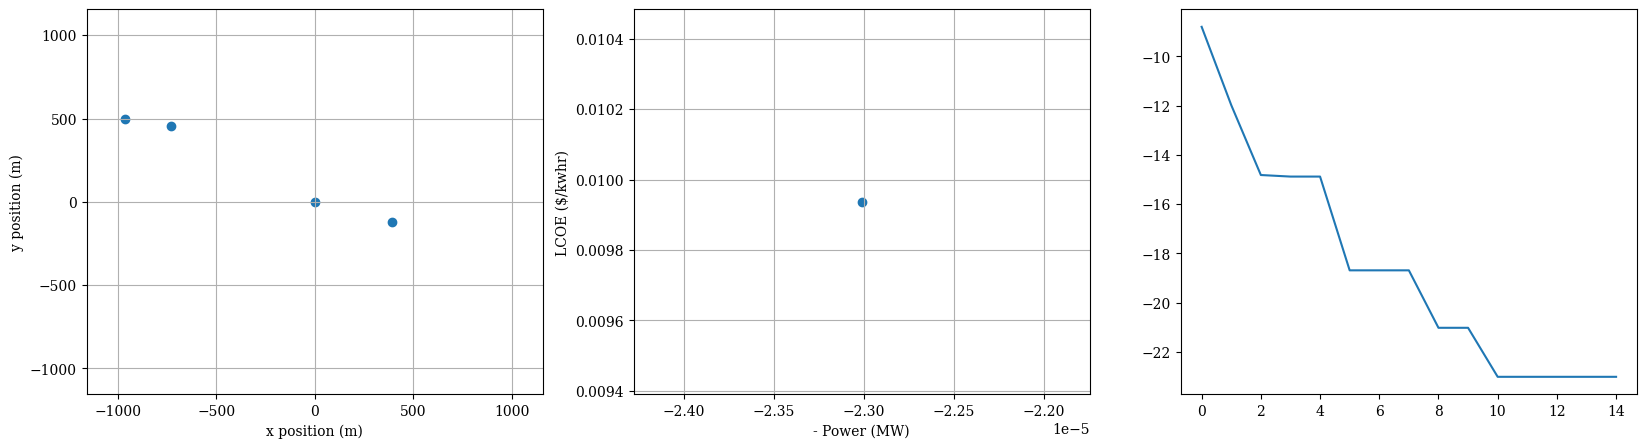

In [43]:
def unpack(x):
    outx=[0,x[2],x[5],x[8]]
    outy=[0,x[3],x[6],x[9]]
    return outx,outy

xx,yy=unpack(res.X[0])

fig,(fig1,fig2,fig3) = plt.subplots(1,3,figsize=(20,5))
fig1.scatter(xx,yy)
fig1.set_xlabel('x position (m)'),fig1.set_ylabel('y position (m)')
mpos=np.max(np.abs([xx,yy]))
fig1.set_xlim([-1.2*mpos,1.2*mpos])
fig1.set_ylim([-1.2*mpos,1.2*mpos])
fig1.grid()
fig2.scatter(res.F[0][0]*10**-6,res.F[0][1])
fig2.set_xlabel('- Power (MW)'),fig2.set_ylabel('LCOE ($/kwhr)')
fig2.grid()

val = res.algorithm.callback.data["best"]
fig3.plot(np.arange(len(val)), val)

plt.show()

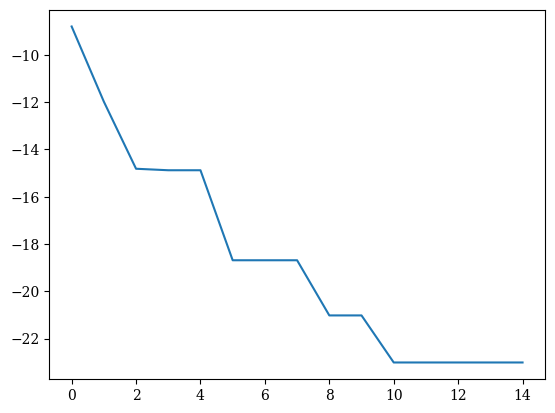

In [36]:
val = res.algorithm.callback.data["best"]
plt.plot(np.arange(len(val)), val)
plt.show()